In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.8.0


# TensorFlow Syntax

In [3]:
hello = tf.constant("Hello")

In [4]:
world =tf.constant("World")

In [5]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
result = hello + world

In [8]:
print(result)

Tensor("add:0", shape=(), dtype=string)


In [9]:
type(result)

tensorflow.python.framework.ops.Tensor

In [10]:
# it only says that this is a tensor to print the tensor 
# I need to open a session
with tf.Session() as sess:
    result=sess.run(hello+world)

In [11]:
print(result)

b'HelloWorld'


# Operations

In [12]:
const = tf.constant(10)

In [13]:
matrix_a= tf.fill((4,4),10)

In [14]:
myzeros =tf.zeros((4,4))

In [15]:
myones = tf.ones((4,4))

In [18]:
myRandN= tf.random_normal((4,4),mean = 0 , stddev=1)

In [19]:
myRandU= tf.random_uniform((4,4),minval= 0 , maxval= 10)

In [21]:
# create a list 
my_ops = [const , matrix_a , myzeros , myones , myRandN, myRandU]

In [117]:
#sess = tf.InteractiveSession()

In [118]:
for op in my_ops:
    print(op.eval())
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.5585959  -0.70827067  0.8126752  -0.11581439]
 [ 0.51946384  1.6165802  -1.568498    1.7104361 ]
 [-0.70452195 -0.72212756  1.4197264  -0.58456594]
 [-0.54762095  0.49906418  0.40161827  1.5122373 ]]


[[2.812618   4.8697305  5.982977   6.9756594 ]
 [0.31436682 6.1946106  2.5959432  3.8768506 ]
 [5.6013956  4.1261983  4.836341   2.9959393 ]
 [7.024828   8.573798   7.251214   6.811545  ]]




# Matrix Multiplication

In [24]:
a = tf.constant([[1,2],
               [3,4]])

In [25]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [26]:
b = tf.constant([[4,5],[8,9]])

In [27]:
b.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [28]:
result = tf.matmul(a,b)

In [29]:
print(result)

Tensor("MatMul:0", shape=(2, 2), dtype=int32)


In [30]:
result.eval()

array([[20, 23],
       [44, 51]], dtype=int32)

# TensorFlow Graph

In [31]:
import tensorflow as tf

In [32]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [33]:
n3 = n1 + n2

In [34]:
with tf.Session() as Sess:
    result = Sess.run(n3)
print(result)    
    

3


In [35]:
# Once I start working with the tf a default graph is created
print(tf.get_default_graph())

In [36]:
#tensorflow.python.framework.ops.Graph object at 0x7f7b81365780 ---> is the memory address

In [39]:
g = tf.Graph()

In [40]:
print(g)

In [41]:
# tensorflow.python.framework.ops.Graph object at 0x7f7b8125b198 ----> created a new graph address is different

In [42]:
# we can set a graph as default graph
graph1 = tf.get_default_graph()

In [43]:
graph1 is tf.get_default_graph()

True

In [44]:
graph2 = tf.Graph()

In [45]:
graph2 is tf.get_default_graph()

False

In [49]:
# I can change the default graph 
# like here I am making graph2 as 
# default graph for this snippet
with graph2.as_default():
    print(graph2 is  tf.get_default_graph())

True


In [50]:
#outside the block of code 
graph2 is tf.get_default_graph()

False

# Variables and Placeholders

In [51]:
#variable
my_tensor = tf.random_uniform((4,4),0,1)

In [52]:
my_var = tf.Variable(initial_value= my_tensor)

In [53]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [54]:
# we need to initialize all global variable
init = tf.global_variables_initializer()

In [55]:
init.run()

In [56]:
my_var.eval()

array([[0.11263597, 0.23102379, 0.5999961 , 0.22362447],
       [0.9121946 , 0.09992647, 0.528198  , 0.8083844 ],
       [0.32032943, 0.13340342, 0.12430155, 0.19072998],
       [0.5906323 , 0.5875325 , 0.29343188, 0.37244594]], dtype=float32)

In [57]:
#Placeholders : Place holder is a variable where we can assign a variable at a later time.
#it allows us to create computational graph and operation without needing the data. In language of 
#Tensorflow we can feed the data into the graph through these placeholders
    

In [58]:
ph = tf.placeholder(tf.float64)

In [59]:
ph = tf.placeholder(tf.int32)

In [60]:
# for shape it is common to use (None , # of features)
ph =tf.placeholder(tf.float32 , shape=(None , 5))

In [61]:
x =tf.placeholder(tf.int32)

In [62]:
y =x*2


In [63]:
with tf.Session() as sess:
    result = sess.run(y , feed_dict={x :[1,2,3]})
    print(result)

[2 4 6]


In [64]:
a = tf.placeholder(tf.int32 , shape=(None , 3)) # (shape=(None , no. of features)) ,where none is the no. of 
#datapoints and features is the features or X.shape[0]
b =a*3
with tf.Session() as sess:
    x_dict =[[1,2,3],[4,5,6]]
    result = sess.run(b , feed_dict = {a:x_dict})
    print(result)

[[ 3  6  9]
 [12 15 18]]


# First Neuron

In [65]:
import numpy as np

In [66]:
np.random.seed(101)
tf.set_random_seed(101)

In [74]:
rand_a=np.random.uniform(0,100,(5,5))

In [75]:
rand_b = np.random.uniform(0,100,(5,1))

In [76]:
# create two placeholders

In [77]:
a =tf.placeholder(tf.float32)
b =tf.placeholder(tf.float32)

# Operation

In [78]:
add = a+b # tf.add(a,b)
mul = a*b #tf.mul(a,b)

In [81]:
with tf.Session() as sess:
        result=sess.run(add , feed_dict={a : rand_a , b: rand_b})
        print(result)  
        print('\n')
        result = sess.run(mul , feed_dict={a: rand_a , b: rand_b})
        print(result)

[[ 79.72189   91.32312  131.01501   80.19618  133.90298 ]
 [129.99011  149.29437  133.38141   85.56626  103.620255]
 [124.54655   79.069405 117.03771   80.826996  72.30688 ]
 [ 83.00446  109.41359  152.93552  160.10318  112.993515]
 [ 88.56883  106.1858    74.917694  54.214703  47.566994]]


[[1017.4501  1757.2122  4288.2007  1047.6931  4472.354  ]
 [3960.8948  5528.914   4236.3584   352.49655 1818.9607 ]
 [3855.3718   807.2192  3352.0842   925.02344  353.9538 ]
 [1161.9514  2883.2126  5719.831   6186.9976  3116.541  ]
 [1957.7695  2705.7314  1378.1847   499.20007  216.95897]]


# A Simple Neural Network

In [82]:
# number of feature
n_features = 12
# no of hidden neurons 
n_hidden_dim =3


In [87]:
# create a placeholder for x (data to be fed into the network)
x = tf.placeholder(tf.float32 ,(None , n_features))

# Variables for w and b
b = tf.Variable(tf.zeros([n_hidden_dim]))
W = tf.Variable(tf.random_normal([n_features , n_hidden_dim]))
                

In [88]:
# forward pass
xW = tf.matmul(x,W)

In [89]:
z = tf.add(xW ,b)

In [90]:
a= tf.sigmoid(z)

In [92]:
#Variable Initializer
init = tf.global_variables_initializer()

In [97]:
with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(a , feed_dict={x: np.random.random([2, n_features])})
    print(layer_out)

[[0.8092373  0.67714286 0.4520406 ]
 [0.61854964 0.9080475  0.4794036 ]]


# Full Network Example having both the forward pass and the backward pass

In [100]:
x_data = np.linspace(0,10,10)+ np.random.uniform(-1.5 , 1.5 , 10)

In [105]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5 , 1.5 , 10)

In [106]:
import matplotlib.pyplot as plt

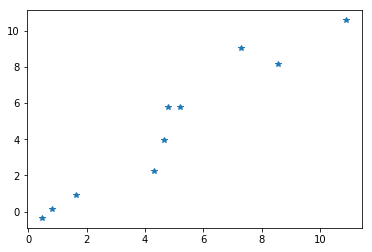

In [109]:
plt.plot(x_data , y_data , '*')

In [110]:
np.random.randn(2)

array([-0.58038298,  1.20902728])

In [111]:
m = tf.Variable(0.58)
b = tf.Variable(1.2)

In [112]:
error =0
for x,y in zip(x_data, y_data):
    y_hat =m*x + b
    error +=(y_hat-y)**2 # mse for regression

In [113]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train =optimizer.minimize(error)

In [114]:
init = tf.global_variables_initializer()


In [121]:
with tf.Session() as sess:
    sess.run(init)
    epochs =100
    for i in range(epochs):
        sess.run(train)
    print(sess.run([m,b]))    
    

[nan, nan]


nan
